<a href="https://colab.research.google.com/github/pangtengg/404Found/blob/main/UMDAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UMDAC DATATHON**
Our research questions:
1. Which factors are the most significant in predicting hourly price movements in the cryptocurrency market?
2. How do these factors behave differently during periods of high versus low market volatility?
3. Are there any indicators in the dataset that signal potential market manipulation, such as sudden spikes in exchange_whale_ratio?

The dataset include several features:



*   `Time series data`: Includes a time column, indicating hourly intervals.
*   `Market metrics`:
difficulty, estimated_leverage_ratio, open_price, high_price, low_price, close_price, and volume.
*   `User activity`:
addresses_count_active, addresses_count_sender, and addresses_count_receiver.
*   `Exchange dynamics`:
exchange_whale_ratio, coinbase_premium_gap, and coinbase_premium_index.
*   `Trading activity`:
long_liquidations, short_liquidations, open_interest, and their USD equivalents.















In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv('UM_datathon_2024.csv')

# Dataset


In [13]:
print("\nInformation of the dataset")
print(data.info())

print("\nNumber of unique value for each column")
print(data.nunique())

print("\nDetermining the data types")
print(data.dtypes)

print("\nFeatures of the dataset ")
print(data.columns)

print("\nFirst few rows of the dataset ")
print(data.head())



Information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19781 entries, 0 to 19780
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   time                                  19781 non-null  object 
 1   difficulty                            19700 non-null  float64
 2   estimated_leverage_ratio              19781 non-null  float64
 3   addresses_count_active                19781 non-null  int64  
 4   addresses_count_sender                19781 non-null  int64  
 5   addresses_count_receiver              19781 non-null  int64  
 6   exchange_whale_ratio                  19781 non-null  float64
 7   coinbase_premium_gap                  19756 non-null  float64
 8   coinbase_premium_index                19756 non-null  float64
 9   coinbase_premium_gap_usdt_adjusted    19756 non-null  float64
 10  coinbase_premium_index_usdt_adjusted  19756 non-null  

In [14]:
# Identify categorical and numerical variables
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

# Identify and print the features and target variable
features = data.columns[0:7]
print('\nFeatures:', features)

target = data['close_price']
print("\nTarget variable: ", target.name)
print("Unique value in the target variable")
print(target.unique())

print(f'\nMaximum close_price\t: {data.close_price.max()/12}')
print(f'Mean close_price\t: {data.close_price.mean()/12}')
print(f'Minimum close_price\t: {data.close_price.min()/12}')

Categorical columns: ['time']
Numerical columns: ['difficulty', 'estimated_leverage_ratio', 'addresses_count_active', 'addresses_count_sender', 'addresses_count_receiver', 'exchange_whale_ratio', 'coinbase_premium_gap', 'coinbase_premium_index', 'coinbase_premium_gap_usdt_adjusted', 'coinbase_premium_index_usdt_adjusted', 'taker_buy_volume', 'taker_sell_volume', 'taker_buy_ratio', 'taker_sell_ratio', 'taker_buy_sell_ratio', 'blockreward', 'blockreward_usd', 'fees_transaction_mean', 'fees_transaction_mean_usd', 'fees_transaction_median', 'fees_transaction_median_usd', 'miner_supply_ratio', 'addresses_count_inflow', 'addresses_count_outflow', 'exchange_supply_ratio', 'transactions_count_inflow', 'transactions_count_outflow', 'tokens_transferred_total', 'tokens_transferred_mean', 'tokens_transferred_median', 'transactions_count_inflow.1', 'transactions_count_outflow.1', 'long_liquidations', 'short_liquidations', 'long_liquidations_usd', 'short_liquidations_usd', 'open_price', 'high_price'

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
difficulty,19700.0,2.086026e+13,4.745860e+12,1.367259e+13,1.734595e+13,1.999734e+13,2.419529e+13,3.125110e+13
estimated_leverage_ratio,19781.0,1.530513e-01,3.338120e-02,6.979016e-02,1.277171e-01,1.456134e-01,1.755236e-01,2.420397e-01
addresses_count_active,19781.0,5.273091e+04,1.994596e+04,0.000000e+00,3.889700e+04,5.080000e+04,6.492100e+04,1.625320e+05
addresses_count_sender,19781.0,2.718399e+04,1.217890e+04,0.000000e+00,1.874700e+04,2.556700e+04,3.428300e+04,9.710700e+04
addresses_count_receiver,19781.0,3.101204e+04,1.163638e+04,0.000000e+00,2.297600e+04,2.979900e+04,3.805300e+04,1.004270e+05
exchange_whale_ratio,19781.0,8.505753e-01,9.771309e-02,0.000000e+00,8.118956e-01,8.655822e-01,9.110390e-01,9.992385e-01
coinbase_premium_gap,19756.0,1.378446e+01,3.193195e+01,-8.299000e+02,1.037500e+00,1.094000e+01,2.411000e+01,1.381930e+03
coinbase_premium_index,19756.0,4.134773e-02,9.419380e-02,-3.060686e+00,4.567075e-03,4.124604e-02,8.011680e-02,2.612461e+00
coinbase_premium_gap_usdt_adjusted,19756.0,2.484994e+00,2.332837e+01,-8.553876e+02,-4.959080e+00,1.403409e+00,8.287284e+00,1.104060e+03
coinbase_premium_index_usdt_adjusted,19756.0,2.728160e-03,7.189665e-02,-3.068518e+00,-1.963301e-02,5.331955e-03,2.797937e-02,2.383460e+00


# Data Cleaning

In [16]:
print("Missing values in data:")
print(data.isnull().sum())

Missing values in data:
time                                     0
difficulty                              81
estimated_leverage_ratio                 0
addresses_count_active                   0
addresses_count_sender                   0
addresses_count_receiver                 0
exchange_whale_ratio                     0
coinbase_premium_gap                    25
coinbase_premium_index                  25
coinbase_premium_gap_usdt_adjusted      25
coinbase_premium_index_usdt_adjusted    25
taker_buy_volume                         0
taker_sell_volume                        0
taker_buy_ratio                          0
taker_sell_ratio                         0
taker_buy_sell_ratio                     0
blockreward                              0
blockreward_usd                          0
fees_transaction_mean                   81
fees_transaction_mean_usd               82
fees_transaction_median                  1
fees_transaction_median_usd              1
miner_supply_ratio            

In [17]:
# Drop columns with >50% missing values
data = data.drop(columns=['fees_transaction_mean', 'fees_transaction_mean_usd'])

# Drop rows with any missing values
data = data.dropna()

In [18]:
import pandas as pd
from sklearn.impute import KNNImputer

# Separate non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number'])
numeric_cols = data.select_dtypes(include=['number'])

# Apply KNN imputer on numeric columns
imputer = KNNImputer(n_neighbors=5)
numeric_cols_imputed = pd.DataFrame(imputer.fit_transform(numeric_cols), columns=numeric_cols.columns)

# Merge back the non-numeric columns
data_cleaned = pd.concat([non_numeric_cols.reset_index(drop=True), numeric_cols_imputed.reset_index(drop=True)], axis=1)


In [19]:
print(data.isnull().sum())

time                                    0
difficulty                              0
estimated_leverage_ratio                0
addresses_count_active                  0
addresses_count_sender                  0
addresses_count_receiver                0
exchange_whale_ratio                    0
coinbase_premium_gap                    0
coinbase_premium_index                  0
coinbase_premium_gap_usdt_adjusted      0
coinbase_premium_index_usdt_adjusted    0
taker_buy_volume                        0
taker_sell_volume                       0
taker_buy_ratio                         0
taker_sell_ratio                        0
taker_buy_sell_ratio                    0
blockreward                             0
blockreward_usd                         0
fees_transaction_median                 0
fees_transaction_median_usd             0
miner_supply_ratio                      0
addresses_count_inflow                  0
addresses_count_outflow                 0
exchange_supply_ratio             

In [20]:
# Check for duplicate rows
print("Duplicate rows in data:")
print(data.duplicated())
data = data.drop_duplicates()

Duplicate rows in data:
0        False
1        False
2        False
4        False
6        False
         ...  
19775    False
19776    False
19777    False
19778    False
19779    False
Length: 19674, dtype: bool


In [21]:
print("Number of duplicate rows in data:", data.duplicated().sum())

Number of duplicate rows in data: 0


# **Outlier**

In [22]:
# Select numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Display numeric columns
print(numeric_data.columns)


Index(['difficulty', 'estimated_leverage_ratio', 'addresses_count_active',
       'addresses_count_sender', 'addresses_count_receiver',
       'exchange_whale_ratio', 'coinbase_premium_gap',
       'coinbase_premium_index', 'coinbase_premium_gap_usdt_adjusted',
       'coinbase_premium_index_usdt_adjusted', 'taker_buy_volume',
       'taker_sell_volume', 'taker_buy_ratio', 'taker_sell_ratio',
       'taker_buy_sell_ratio', 'blockreward', 'blockreward_usd',
       'fees_transaction_median', 'fees_transaction_median_usd',
       'miner_supply_ratio', 'addresses_count_inflow',
       'addresses_count_outflow', 'exchange_supply_ratio',
       'transactions_count_inflow', 'transactions_count_outflow',
       'tokens_transferred_total', 'tokens_transferred_mean',
       'tokens_transferred_median', 'transactions_count_inflow.1',
       'transactions_count_outflow.1', 'long_liquidations',
       'short_liquidations', 'long_liquidations_usd', 'short_liquidations_usd',
       'open_price', 'hig

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Drop non-numeric columns and target variable for normalization
numeric_data = data.drop(columns=["time", "close_price"])  # Exclude non-numeric and target variable

# Apply Standard Scaling
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_data)

# Convert back to a DataFrame for readability
standardized_df = pd.DataFrame(standardized_data, columns=numeric_data.columns)

# Add back the target variable (if needed)
standardized_df["close_price"] = data["close_price"].values
standardized_df["time"] = data["time"].values

# Display the first few rows of the standardized data
print(standardized_df.head())

   difficulty  estimated_leverage_ratio  addresses_count_active  \
0   -0.907943                 -2.471142               -1.131883   
1   -0.907943                 -2.429550               -1.603011   
2   -0.907943                 -2.407977               -1.207653   
3   -0.907943                 -2.429744               -1.407237   
4   -0.907943                 -2.444947               -0.968559   

   addresses_count_sender  addresses_count_receiver  exchange_whale_ratio  \
0               -1.193113                 -0.829067              1.068830   
1               -1.559318                 -1.416006              0.392844   
2               -1.159648                 -1.039397              0.376683   
3               -1.414029                 -1.112351              0.163058   
4               -1.192367                 -0.549962             -0.118383   

   coinbase_premium_gap  coinbase_premium_index  \
0             -0.039690                1.572425   
1              0.152645         

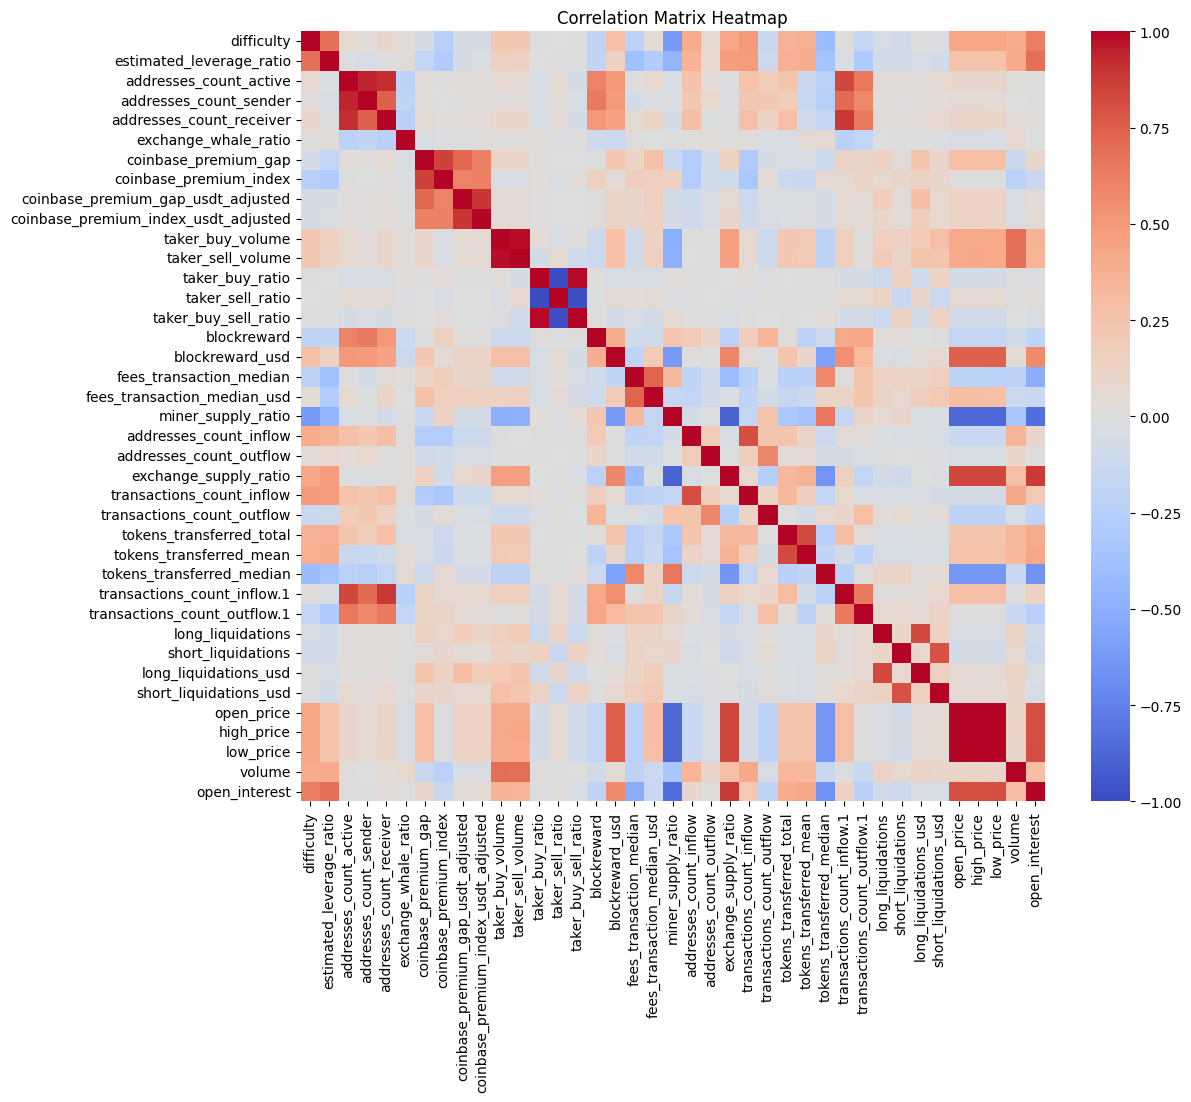

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns and the target variable (if included)
numeric_data = standardized_df.drop(columns=["time", "close_price"])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


The correlation heatmap visualizes how various financial and market metrics interact. Warmer colors (e.g., red) indicate strong positive correlations, suggesting closely related or dependent features, while cooler colors (e.g., blue) reveal negative correlations or contrasting relationships.



# 3. Are there any indicators in the dataset that signal potential market manipulation, such as sudden spikes in exchange_whale_ratio?

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [26]:
# Compute rolling mean and standard deviation
standardized_df['whale_ratio_mean'] = standardized_df['exchange_whale_ratio'].rolling(window=10).mean()
standardized_df['whale_ratio_std'] = standardized_df['exchange_whale_ratio'].rolling(window=10).std()

In [27]:
# Identify spikes (e.g., Z-score > 3)
standardized_df['whale_ratio_zscore'] = (standardized_df['exchange_whale_ratio'] - standardized_df['exchange_whale_ratio'].mean()) / standardized_df['exchange_whale_ratio'].std()
standardized_df['spike'] = standardized_df['whale_ratio_zscore'] > 3
# standardized_df['whale_ratio_zscore'] = zscore(standardized_df['exchange_whale_ratio'])
# standardized_df['spike'] = standardized_df['whale_ratio_zscore'] > 3

Spikes detected:
Time: 2020-05-02 18:00:00, exchange_whale_ratio: -3.569009536260744, Z-score: 3.569009536260744
Time: 2020-05-15 23:00:00, exchange_whale_ratio: -7.6313420361801745, Z-score: 7.6313420361801745
Time: 2020-05-23 15:00:00, exchange_whale_ratio: -3.8231856273922453, Z-score: 3.8231856273922453
Time: 2020-05-23 21:00:00, exchange_whale_ratio: -4.106575673113692, Z-score: 4.106575673113692
Time: 2020-05-28 23:00:00, exchange_whale_ratio: -3.3902932793264595, Z-score: 3.3902932793264595
Time: 2020-06-08 22:00:00, exchange_whale_ratio: -7.344154030978522, Z-score: 7.344154030978522
Time: 2020-06-16 15:00:00, exchange_whale_ratio: -3.138674705968595, Z-score: 3.138674705968595
Time: 2020-06-20 19:00:00, exchange_whale_ratio: -3.154125400467241, Z-score: 3.154125400467241
Time: 2020-06-20 22:00:00, exchange_whale_ratio: -3.1432944519190857, Z-score: 3.1432944519190857
Time: 2020-06-21 20:00:00, exchange_whale_ratio: -3.1242075679005756, Z-score: 3.1242075679005756
Time: 2020-06

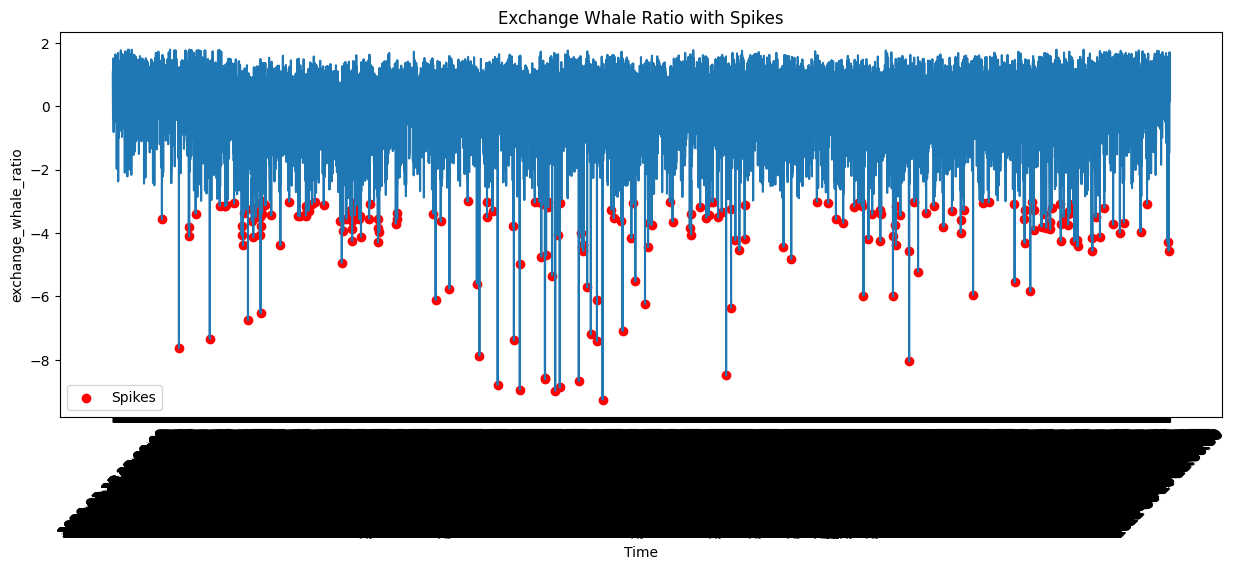

In [28]:
# prompt: how to find the spike

# Assuming 'data' DataFrame is already loaded and processed as in your provided code.

# Identify spikes based on Z-score (adjust threshold as needed)
threshold = 3  # Example threshold: values above 2.5 standard deviations from the mean
standardized_df['whale_ratio_zscore'] = np.abs(zscore(standardized_df['exchange_whale_ratio'])) # Use np.abs for absolute value
standardized_df['spike'] = standardized_df['whale_ratio_zscore'] > threshold

# Find the indices of the spikes
spike_indices = standardized_df.index[standardized_df['spike'] == True].tolist()

# Print the time and exchange_whale_ratio at the spike points
print("Spikes detected:")
for index in spike_indices:
    # Access 'whale_ratio_zscore' from standardized_df, not data
    print(f"Time: {standardized_df['time'][index]}, exchange_whale_ratio: {standardized_df['exchange_whale_ratio'][index]}, Z-score: {standardized_df['whale_ratio_zscore'][index]}")

#Plot the exchange_whale_ratio with identified spikes
plt.figure(figsize=(15, 5))
plt.plot(standardized_df['time'], standardized_df['exchange_whale_ratio'])
plt.scatter(standardized_df['time'][spike_indices], standardized_df['exchange_whale_ratio'][spike_indices], color='red', label='Spikes')
plt.xlabel('Time')
plt.ylabel('exchange_whale_ratio')
plt.title('Exchange Whale Ratio with Spikes')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [29]:
print(f"Number of spikes detected: {len(standardized_df[standardized_df['spike'] == True])}")

Number of spikes detected: 213


In [30]:
# Correlation analysis
correlation_matrix = standardized_df[[
    'exchange_whale_ratio',
    'taker_buy_sell_ratio',
    'volume',
    'close_price',
    'exchange_supply_ratio',
    'long_liquidations',
    'short_liquidations'
]].corr()
correlation_matrix



,exchange_whale_ratio,taker_buy_sell_ratio,volume,close_price,exchange_supply_ratio,long_liquidations,short_liquidations
exchange_whale_ratio,1.000000,0.014253,0.072610,-0.035273,0.008782,-0.007203,0.007468
taker_buy_sell_ratio,0.014253,1.000000,-0.001452,-0.083403,-0.035585,-0.125336,0.145981
volume,0.072610,-0.001452,1.000000,0.105880,0.280438,0.125668,0.064360
close_price,-0.035273,-0.083403,0.105880,1.000000,0.838158,-0.038423,-0.076475
exchange_supply_ratio,0.008782,-0.035585,0.280438,0.838158,1.000000,-0.073524,-0.106943
long_liquidations,-0.007203,-0.125336,0.125668,-0.038423,-0.073524,1.000000,0.105573
short_liquidations,0.007468,0.145981,0.064360,-0.076475,-0.106943,0.105573,1.000000


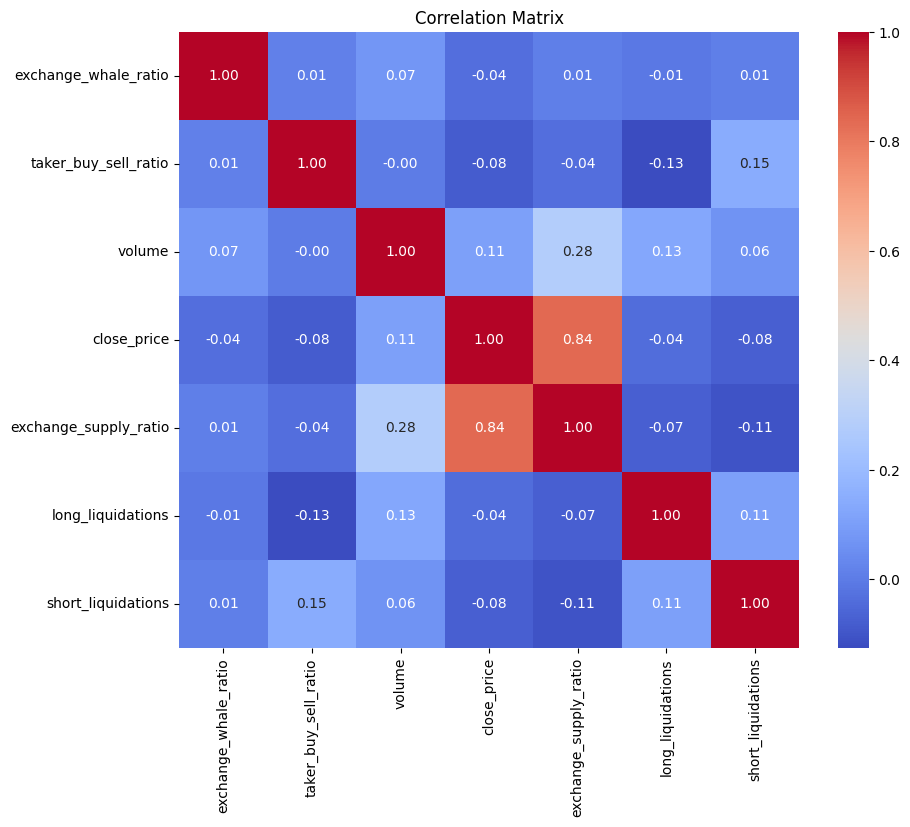

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [32]:
# prompt: how many rows are there after data cleaning

print(len(data_cleaned))

19674


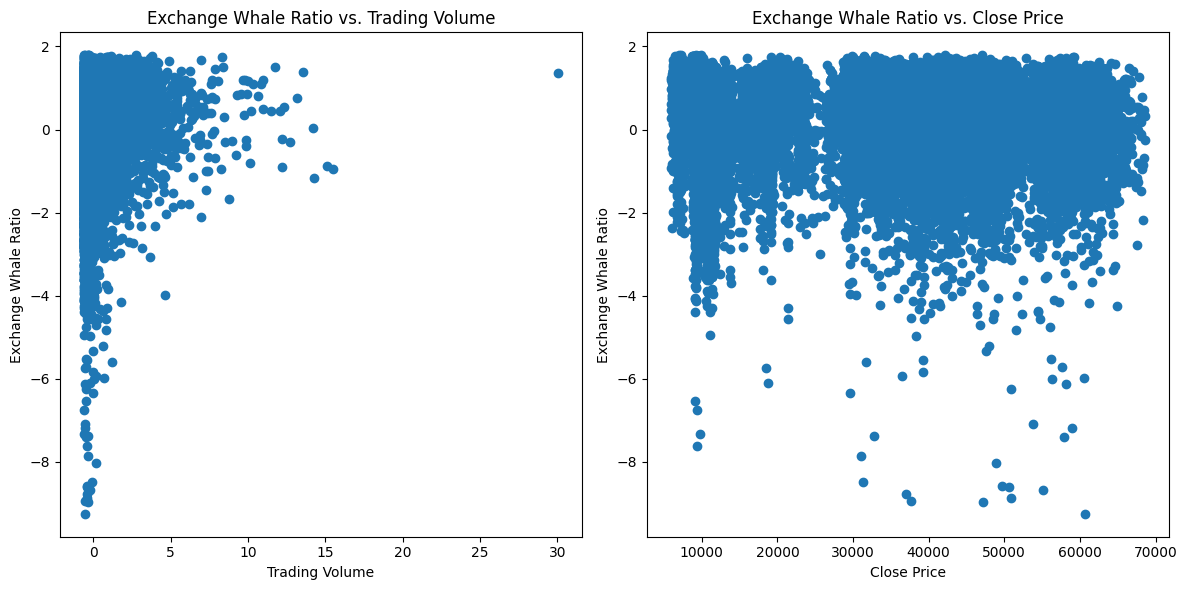

In [33]:
# prompt: generate a plot to show Exchange whale ratio vs. trading volume and Exchange whale ratio vs. trading volume.

plt.figure(figsize=(12, 6))

# Exchange Whale Ratio vs. Trading Volume
plt.subplot(1, 2, 1)
plt.scatter(standardized_df['volume'], standardized_df['exchange_whale_ratio'])
plt.xlabel('Trading Volume')
plt.ylabel('Exchange Whale Ratio')
plt.title('Exchange Whale Ratio vs. Trading Volume')

# Exchange Whale Ratio vs. Close Price
plt.subplot(1, 2, 2)
plt.scatter(standardized_df['close_price'], standardized_df['exchange_whale_ratio'])
plt.xlabel('Close Price')
plt.ylabel('Exchange Whale Ratio')
plt.title('Exchange Whale Ratio vs. Close Price')


plt.tight_layout()
plt.show()

In [34]:
# Example code showing relationship between spikes and price
def analyze_price_impact(standardized_df):
    # Calculate average price change during spike events
    spike_events = standardized_df[standardized_df['is_spike'] == True]
    price_changes = spike_events['close_price'].pct_change()

    print(f"Average price change during spikes: {price_changes.mean():.2%}")
    print(f"Maximum price impact: {price_changes.max():.2%}")

In [ ]:
analyze_price_impact(standardized_df)

Average price change during spikes: 0.68%
Maximum price impact: 38.83%


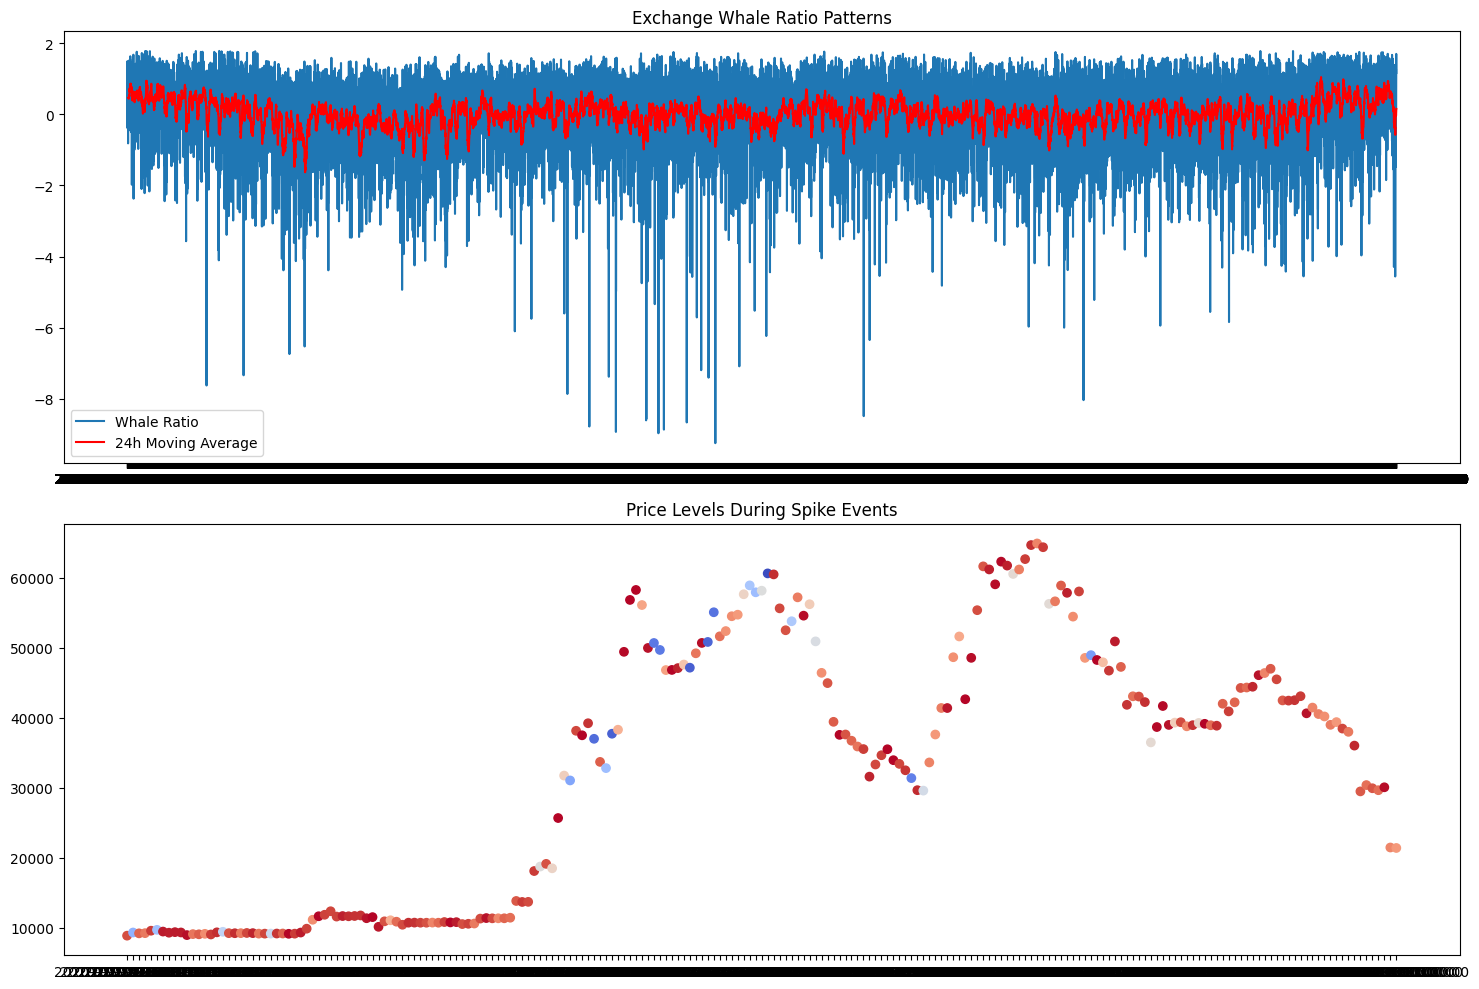

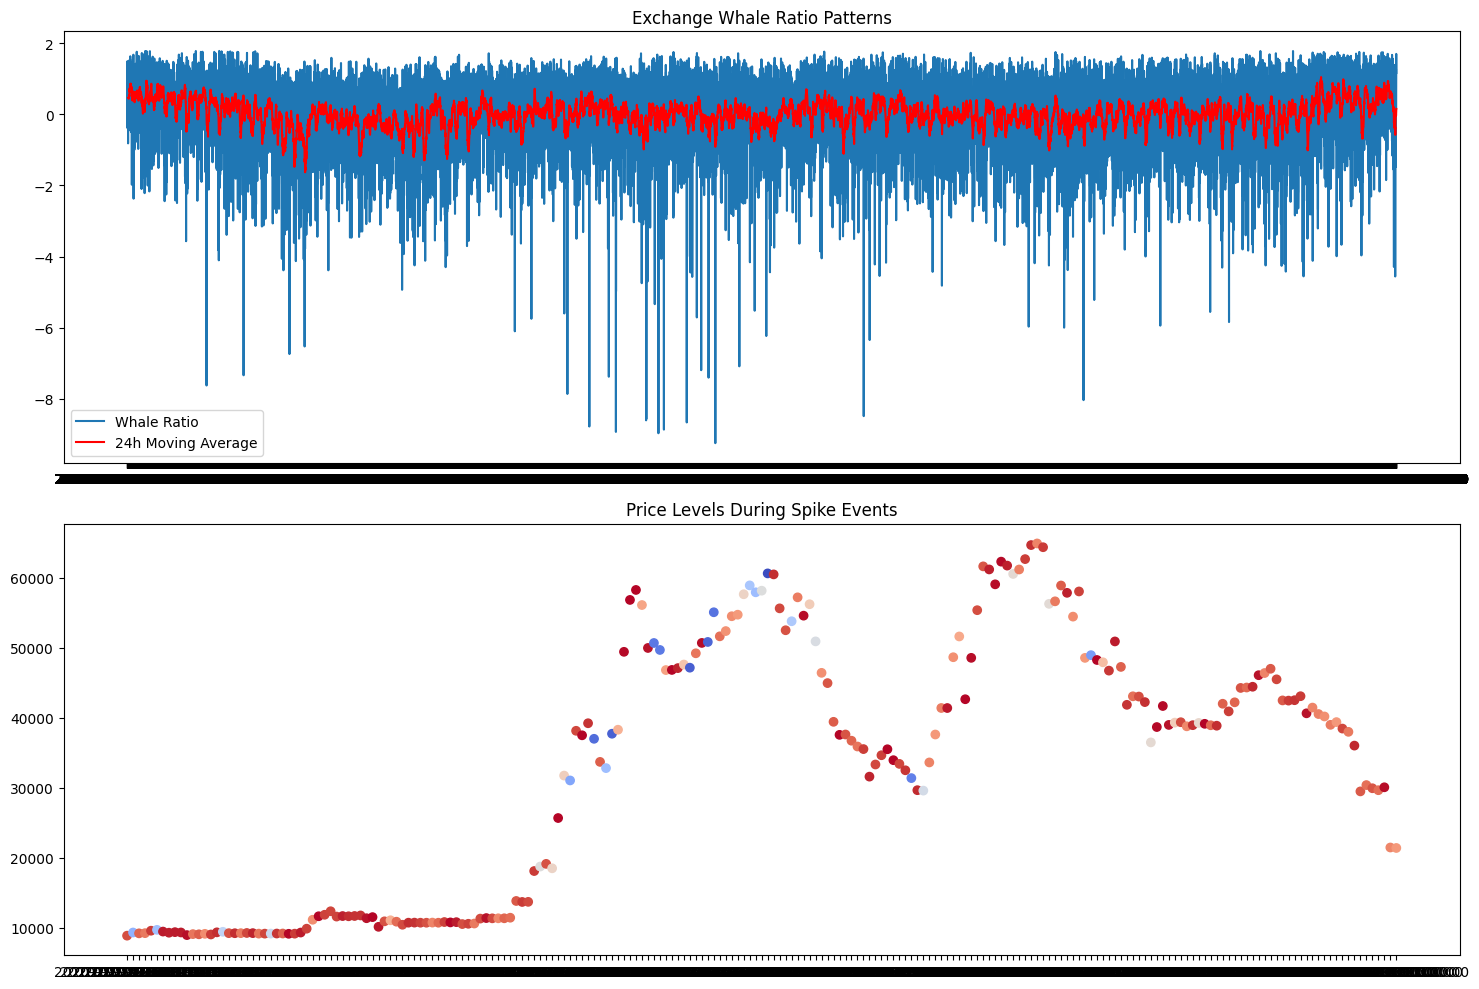

In [39]:
# Example code showing relationship between spikes and price
def analyze_price_impact(standardized_df):
    # Calculate average price change during spike events
    # Changed 'is_spike' to 'spike' to match the column name
    spike_events = standardized_df[standardized_df['spike'] == True]
    price_changes = spike_events['close_price'].pct_change()

    print(f"Average price change during spikes: {price_changes.mean():.2%}")
    print(f"Maximum price impact: {price_changes.max():.2%}")

def plot_findings_summary(standardized_df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Plot 1: Whale Ratio with Moving Average
    ax1.plot(standardized_df['time'], standardized_df['exchange_whale_ratio'], label='Whale Ratio')
    ax1.plot(standardized_df['time'], standardized_df['exchange_whale_ratio'].rolling(24).mean(),
             label='24h Moving Average', color='red')
    ax1.set_title('Exchange Whale Ratio Patterns')
    ax1.legend()

    # Plot 2: Price Impact Analysis
    # Changed 'is_spike' to 'spike' to match the column name
    spike_events = standardized_df[standardized_df['spike'] == True]
    ax2.scatter(spike_events['time'], spike_events['close_price'],
                c=spike_events['exchange_whale_ratio'], cmap='coolwarm')
    ax2.set_title('Price Levels During Spike Events')

    plt.tight_layout()
    return fig


analyze_price_impact(standardized_df)
plot_findings_summary(standardized_df)